<a href="https://colab.research.google.com/github/minshyee/paper_openset/blob/main/QOD_exp1_ssd%2Bmobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

torch.Size([3, 1417, 2126])
Batch shape: [torch.Size([3, 1417, 2126])]


/usr/local/lib/python3.10/dist-packages/torchvision/utils.py:223: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


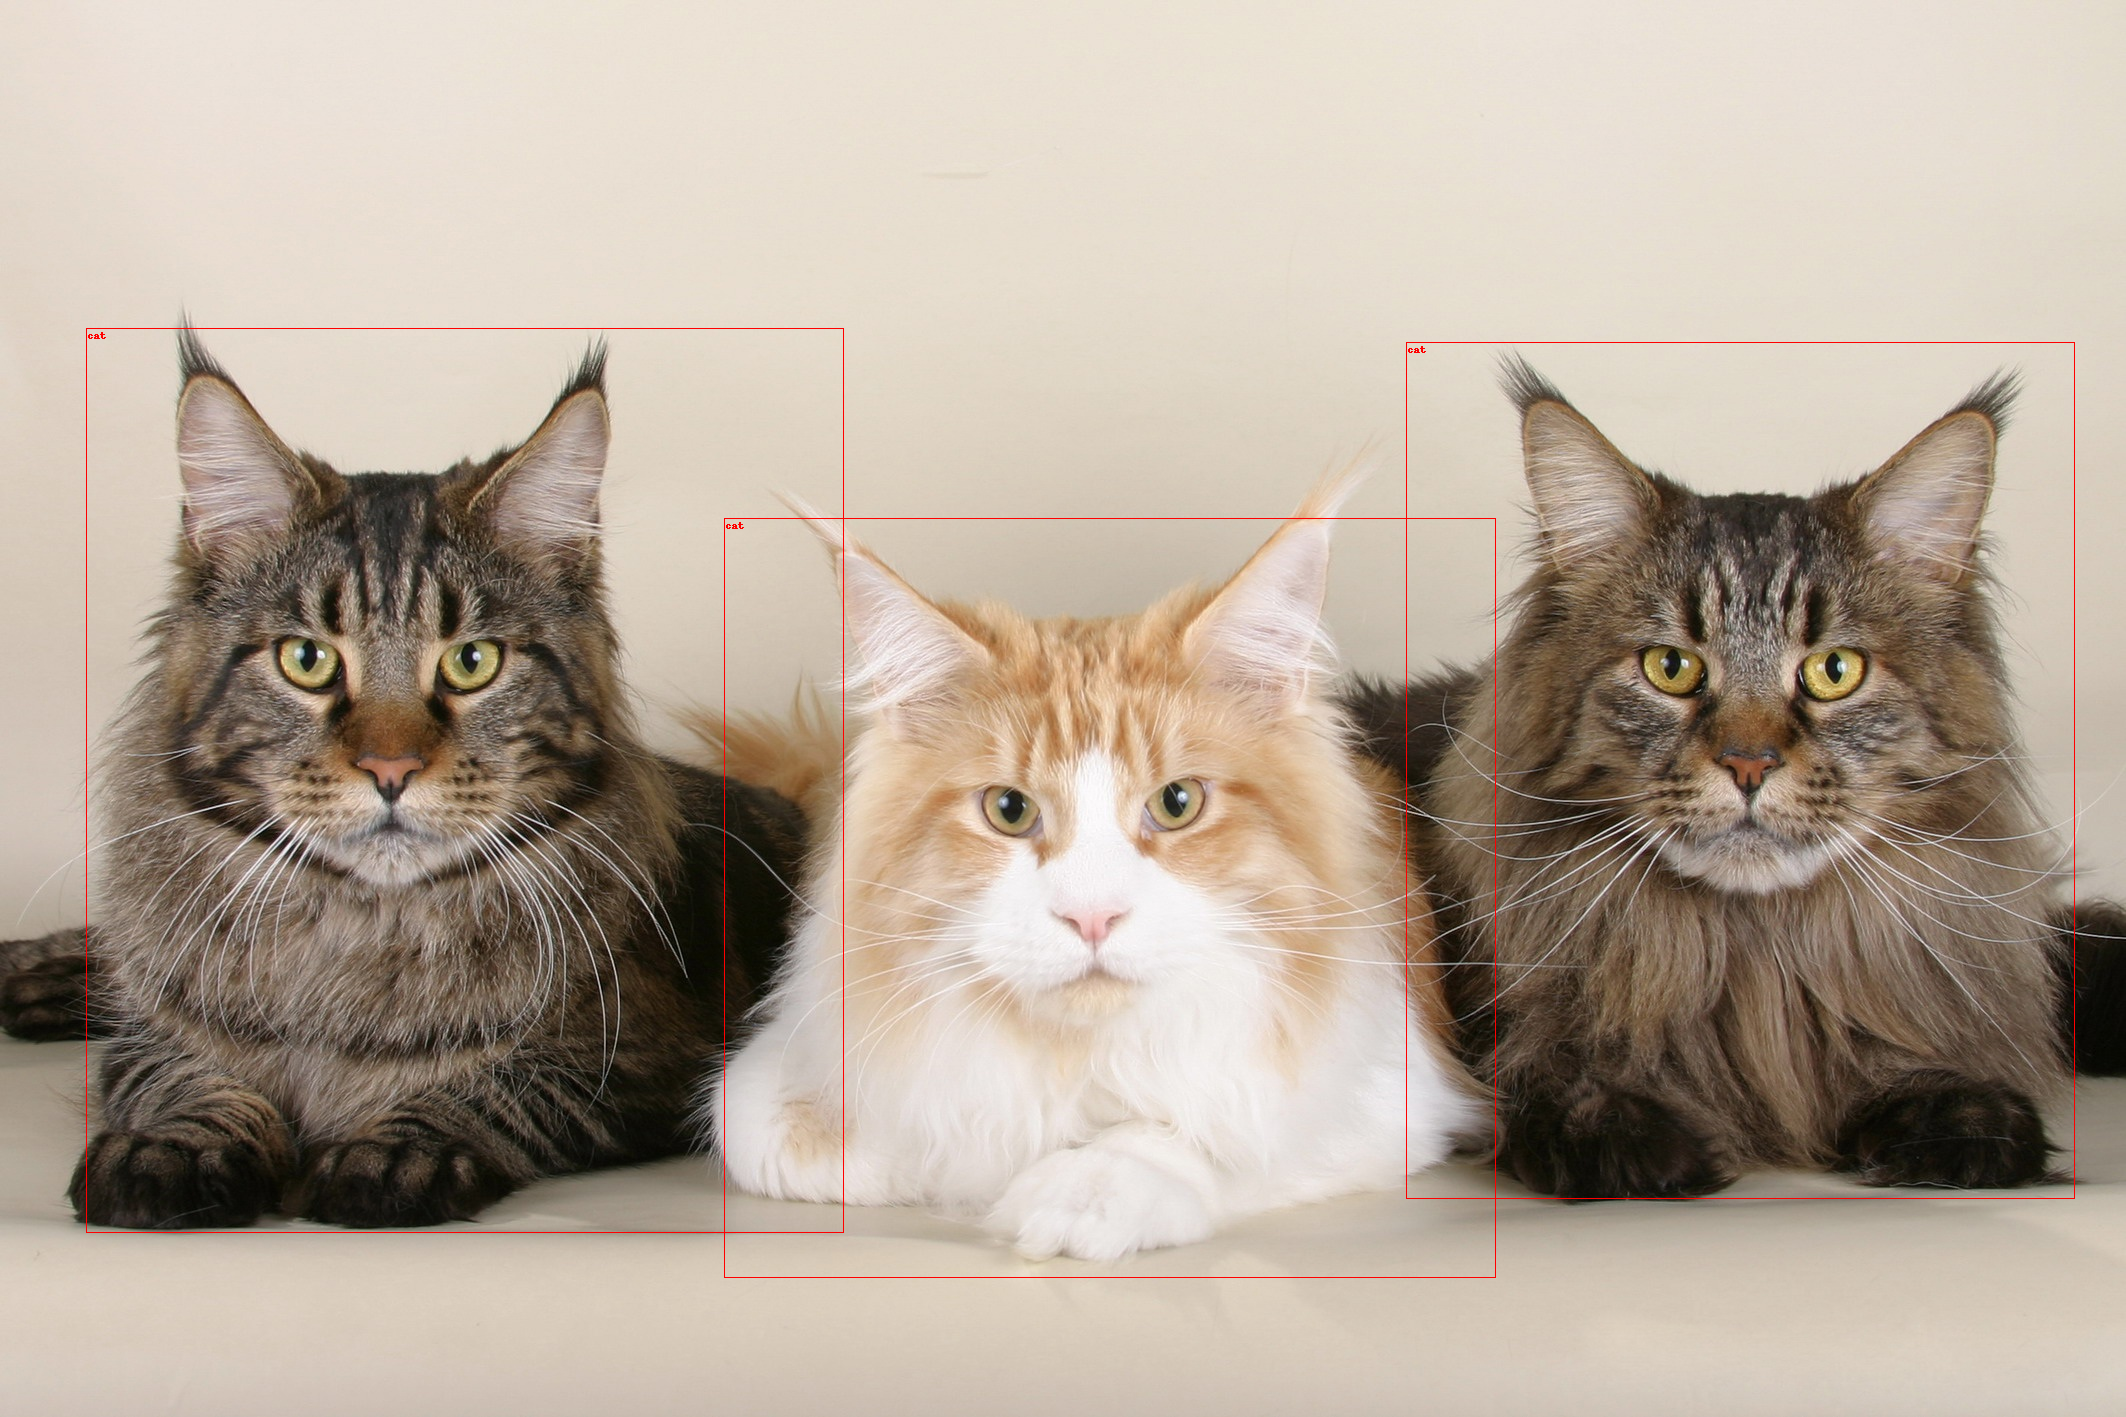

In [89]:
from torchvision.io.image import read_image
from torchvision.models.detection import SSDLite320_MobileNet_V3_Large_Weights, ssdlite320_mobilenet_v3_large
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

img = read_image("/content/test_img3.jpeg")
# img.convert('RGB')
print(img.shape)


# Step 1: Initialize model with the best available weights
weights = SSDLite320_MobileNet_V3_Large_Weights.DEFAULT
# print(weights.image_mean)
model = ssdlite320_mobilenet_v3_large(weights=weights, box_score_thresh=0.9)
model.eval()


# # Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# # Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]
print("Batch shape:", [b.shape for b in batch])


# # print(model(batch))
# # # Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]


filtered = prediction['scores'] > 0.9
labels = [weights.meta["categories"][i] for i in prediction["labels"][filtered]]
box = draw_bounding_boxes(img, boxes=prediction['boxes'][filtered],
                          labels=labels,
                          colors="red",
                          width=1, font_size=10)
im = to_pil_image(box.detach())
# im.show()
im

In [46]:
prediction

{'boxes': tensor([[111.4064,  62.1373, 150.6160, 139.5310],
         [ 23.7357,  85.8404,  37.8438,  91.8790],
         [  2.6193,  89.0561,  46.3348, 119.8822],
         ...,
         [ 13.0320,  34.2952,  55.7741,  51.9506],
         [248.2729,  59.8084, 268.3137, 107.2971],
         [ 23.3750,  40.4281, 256.2884, 133.0952]], grad_fn=<StackBackward0>),
 'scores': tensor([0.9764, 0.1525, 0.1368, 0.1306, 0.1205, 0.1166, 0.1130, 0.1093, 0.1083,
         0.1063, 0.1009, 0.1005, 0.0985, 0.0969, 0.0888, 0.0870, 0.0862, 0.0860,
         0.0857, 0.0844, 0.0843, 0.0838, 0.0833, 0.0832, 0.0821, 0.0813, 0.0799,
         0.0797, 0.0795, 0.0793, 0.0784, 0.0782, 0.0775, 0.0759, 0.0756, 0.0752,
         0.0748, 0.0737, 0.0727, 0.0726, 0.0721, 0.0716, 0.0708, 0.0708, 0.0708,
         0.0707, 0.0706, 0.0700, 0.0698, 0.0690, 0.0687, 0.0685, 0.0682, 0.0679,
         0.0676, 0.0674, 0.0672, 0.0666, 0.0662, 0.0659, 0.0653, 0.0653, 0.0651,
         0.0650, 0.0645, 0.0640, 0.0640, 0.0639, 0.0637, 0.0631, 0

In [86]:
model.__dict__['_modules']

OrderedDict([('backbone',
              SSDLiteFeatureExtractorMobileNet(
                (features): Sequential(
                  (0): Sequential(
                    (0): Conv2dNormActivation(
                      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
                      (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
                      (2): Hardswish()
                    )
                    (1): InvertedResidual(
                      (block): Sequential(
                        (0): Conv2dNormActivation(
                          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
                          (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
                          (2): ReLU(inplace=True)
                        )
                        (1): Conv2dNormActivation(
                          (0): Conv

In [117]:
from torchinfo import summary
import torch

summary(model)

Layer (type:depth-idx)                                       Param #
SSD                                                          --
├─SSDLiteFeatureExtractorMobileNet: 1-1                      --
│    └─Sequential: 2-1                                       --
│    │    └─Sequential: 3-1                                  869,096
│    │    └─Sequential: 3-2                                  751,416
│    └─ModuleList: 2-2                                       --
│    │    └─Sequential: 3-3                                  258,304
│    │    └─Sequential: 3-4                                  100,480
│    │    └─Sequential: 3-5                                  67,712
│    │    └─Sequential: 3-6                                  25,664
├─DefaultBoxGenerator: 1-2                                   --
├─SSDLiteHead: 1-3                                           --
│    └─SSDLiteClassificationHead: 2-3                        --
│    │    └─ModuleList: 3-7                                  1,286,604
